#Small-angle X-ray scattering and Root-mean-square deviation of atomic positions correlation using Machine Learning 

## Main Concepts
###Small-angle X-ray scattering
Small-angle X-ray scattering (SAXS) is a small-angle scattering (SAS) technique where the elastic scattering of X-rays (wavelength 0.1 ... 0.2 nm) by a sample which has inhomogeneities in the nm-range, is recorded at very low angles (typically 0.1 - 10°). This angular range contains information about the shape and size of macromolecules, characteristic distances of partially ordered materials, pore sizes, and other data. SAXS is capable of delivering structural information of macromolecules between 5 and 25 nm, of repeat distances in partially ordered systems of up to 150 nm.[1] USAXS (ultra-small angle X-ray scattering) can resolve even larger dimensions.

![SAXS Scheme](saxs.gif)

Two youtube videos introducing SAXS:
- [One](https://www.youtube.com/watch?v=SevPRumWqsE)
- [Two](https://www.youtube.com/watch?v=mPoshDWJucI)

###Root-mean-square deviation of atomic positions
The root-mean-square deviation (RMSD) is the measure of the average distance between the atoms (usually the backbone atoms) of superimposed proteins. In the study of globular protein conformations, one customarily measures the similarity in three-dimensional structure by the RMSD of the Cα atomic coordinates after optimal rigid body superposition.

When a dynamical system fluctuates about some well-defined average position, the RMSD from the average over time can be referred to as the RMSF or root mean square fluctuation. The size of this fluctuation can be measured, for example using Mössbauer spectroscopy or nuclear magnetic resonance, and can provide important physical information. The Lindemann index is a method of placing the RMSF in the context of the parameters of the system.

### Machine Learning
Machine learning is a subfield of computer science that evolved from the study of pattern recognition and computational learning theory in artificial intelligence. Machine learning explores the construction and study of algorithms that can learn from and make predictions on data.

## Finding the correlation between SAXS and RMSD
To find the correlation betweeen both techniques, as we have a lot of dimenssions for each vector, it would be a good idea to perform a **PCA** and then try to predict the quantity of Y using *Lasso* or *ElasticNet*

![ML Cheat Sheet](cheat_sheet.png)

In [1]:
!ls -l

total 5968
-rw-r--r--  1 gabi  staff   377814 Jun 25 19:52 SAXS and RMSD applied ML.ipynb
-rw-------@ 1 gabi  staff   705376 Jun 23 13:24 cheat_sheet.png
-rw-r-----@ 1 gabi  staff  1932080 Jun 22 13:51 curves.npy
-rw-r-----@ 1 gabi  staff    19400 Jun 22 13:51 rmsds.npy
-rw-------@ 1 gabi  staff     8325 Jun 23 13:38 saxs.gif


## Analyzing the data
First step in every data analysis procedurement is to understandthe data we have

In [2]:
import numpy as np

In [3]:
# load arrays
curves = np.load('curves.npy')
rmsds = np.load('rmsds.npy')

In [4]:
curves.shape, curves.size, curves.dtype

((2415, 100), 241500, dtype('float64'))

In [5]:
rmsds.shape, rmsds.size, rmsds.dtype

((2415,), 2415, dtype('float64'))

In our data X will be the SAXS curves, 2415 samples of 100 dimensions. The Y will be the measurement obtained from RMSD of those samples.

To get an idea of the curves present in X, let's explore them by plotting them:

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, IntSliderWidget

:0: FutureWarning: IPython widgets are experimental and may change in the future.


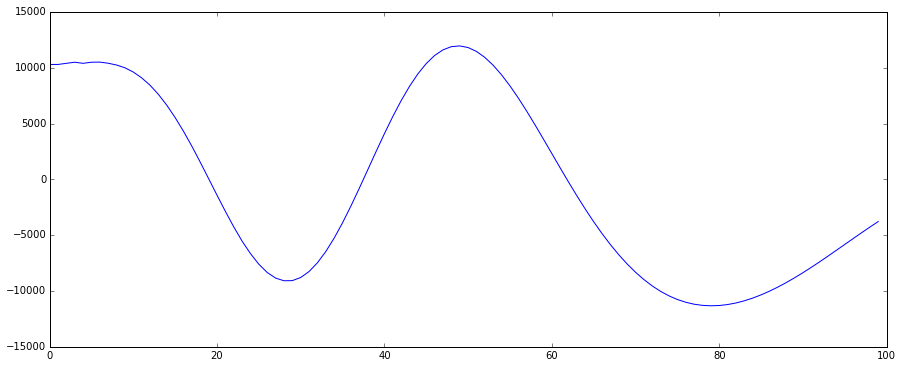

In [9]:
@interact(i=IntSliderWidget(min=0, max=len(curves)-1), step=1)
def interactive_plot(i=20):
    fig = plt.figure(figsize=(15,6))
    return plt.plot(curves[i])

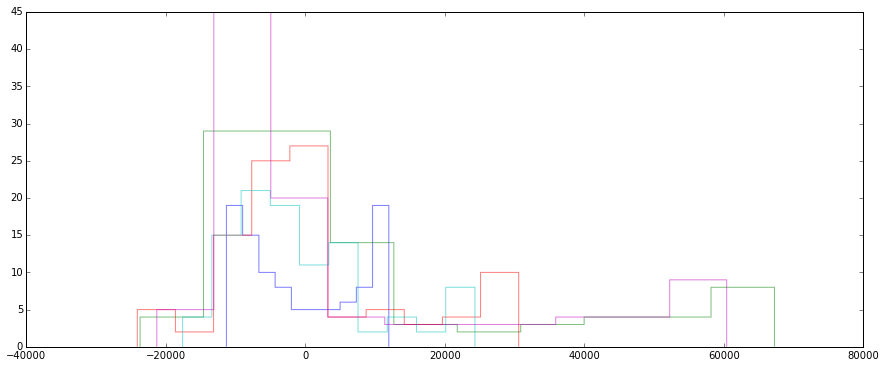

In [33]:
fig = plt.figure(figsize=(15,6))
for protein in curves[:5]:
    plt.hist(protein, bins=10, alpha=0.5, histtype='step')

Most repetead values are between -20.000 and 20.000

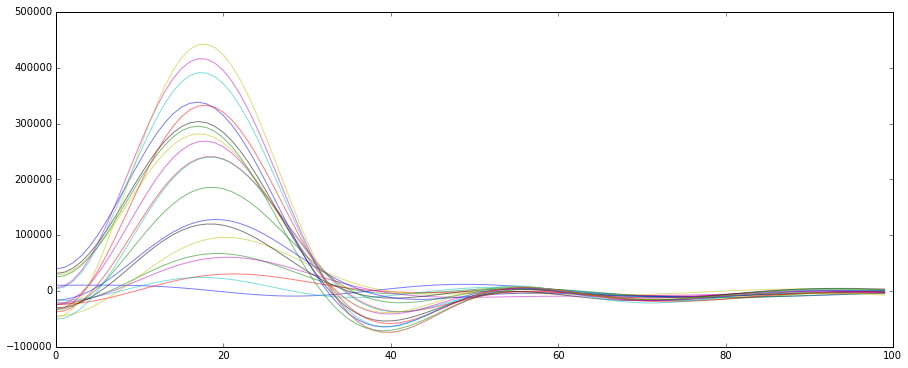

In [34]:
fig = plt.figure(figsize=(15,6))
for protein in curves[:20]:
    plt.plot(protein, alpha=0.5)

Dimension 20 and 40 appear to be those with a bigger variability.

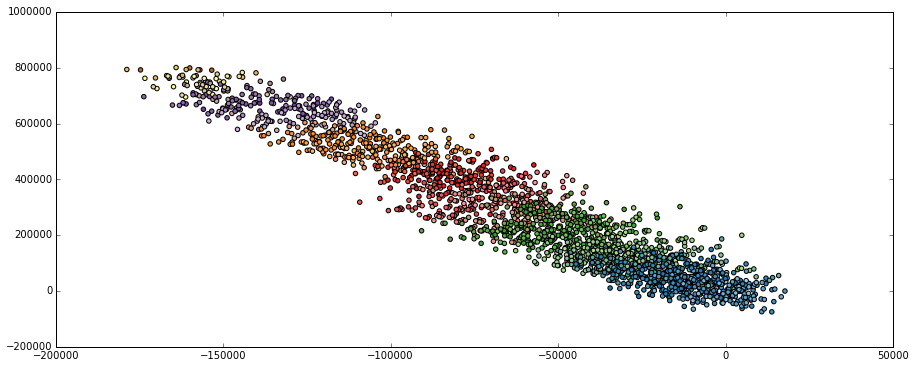

In [12]:
fig_scatter_20 = plt.figure(figsize=(15,6))
plt.scatter(curves[:, 40], curves[:, 20], c=rmsds, cmap=plt.cm.Paired)

It looks that using dimensions 20 and 40, the data can be classified as seen by the different colors paring 

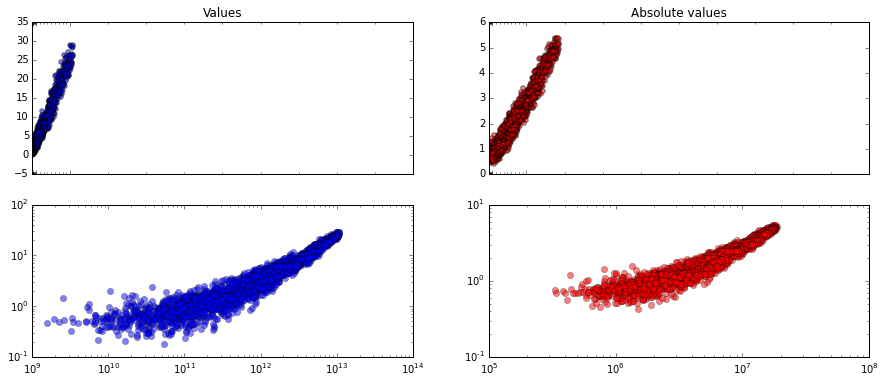

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')

fig.set_figwidth(15)
fig.set_figheight(6)

ax1.set_title('Values')
ax1.scatter(np.sum(curves**2, axis=1), rmsds**2, marker='o', c='b', alpha=0.5)

ax2.set_title('Absolute values')
ax2.scatter(np.sum(np.abs(curves), axis=1), rmsds, marker='o', c='r', alpha=0.5)

#logaritmic scaling
ax3.loglog(np.sum(curves**2, axis=1), rmsds**2, 'o', alpha=0.5)
ax4.loglog(np.sum(np.abs(curves), axis=1), rmsds, 'ro', alpha=0.5)

### Principal component analysis
Principal component analysis is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables. 

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [15]:
X = scale(curves)
Y = rmsds

In [16]:
pca = PCA(n_components=10)
X_r = pca.fit_transform(X)

In [17]:
import plotly
plotly.tools.set_credentials_file(username='merqurio', api_key='s74nft8nuf', stream_ids=['chvycfpauq', 'zzjhbj7ixv'])

In [18]:
from plotly.graph_objs import Scatter3d, Data, Marker

trace0 = Scatter3d(
    x=X_r[:, 0],
    y=X_r[:, 1],
    z=X_r[:, 2],
    marker=Marker(color=rmsds, colorscale='Portland'),
    mode='markers'
)
data = Data([trace0])

In [19]:
plotly.plotly.iplot(data, filename = 'pca-cloud')

It looks like the PCA reduction really helps even if most of the cases are concentrated in the blue area.

In [21]:
np.sum(pca.explained_variance_)

99.999394981861968

With the first 10 components 99.999 of the variation is explained

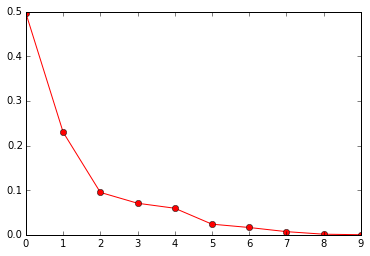

In [66]:
plt.plot(pca.explained_variance_ratio_, 'ro-')

In [40]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale # Standardize a dataset along any axis

Split arrays or matrices into random train and test subsets:

In [60]:
X_train, X_test, y_train, y_test = train_test_split(scale(curves), rmsds, test_size=0.2, random_state=10)

PLS 2 blocks regression known as PLS2 or PLS1 in case of one dimensional response.

In [61]:
from sklearn.cross_decomposition import PLSRegression

In [62]:
pls = PLSRegression(n_components=10)
pls.fit(X_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=10, scale=True, tol=1e-06)

Apply the dimension reduction learned on the train data.

In [63]:
Y_pred = pls.predict(X_test)

The coefficient of determination R^2 of the prediction:

In [67]:
pls.score(X_test, y_test)

0.97228583429646342

In [69]:
Y_pred.shape, y_test.shape

((483, 1), (483,))

In [75]:
Y_diff = Y_pred - y_test.reshape(483,1)

(array([  8.,   9.,  40.,  56.,  94.,  94.,  90.,  58.,  27.,   7.]),
 array([-0.56594543, -0.45954152, -0.35313762, -0.24673372, -0.14032981,
        -0.03392591,  0.07247799,  0.1788819 ,  0.2852858 ,  0.3916897 ,
         0.49809361]),
 <a list of 10 Patch objects>)

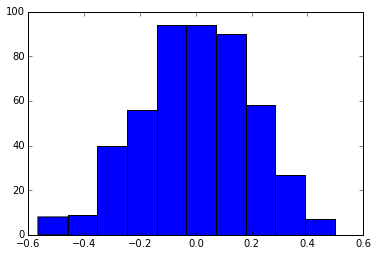

In [76]:
plt.hist(Y_diff)

Error distributes in a Normal

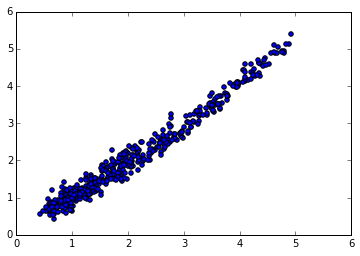

In [79]:
plt.scatter(Y_pred, y_test.reshape(483,1))

In [81]:
from scipy.stats import linregress

In [84]:
slope, intercept, r_value, p_value, std_err = linregress(Y_pred.reshape(483,), y_test)

In [86]:
"The p-value {0} and the Std deviation {1}".format(p_value, std_err)

'The p-value 0.0 and the Std deviation 0.007763716331250042'

It looks like the predicted Y from the test dataset and the actual Y are linerly correlated

### Used resources

In [ ]:
# you only need to do this once IF version information is not already installed
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

In [31]:
%load_ext version_information

In [32]:
%version_information numpy, matplotlib, sklearn, plotly

Software versions
Python 3.4.3 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.49)]
IPython 3.1.0
OS Darwin 14.3.0 x86_64 i386 64bit
numpy 1.9.2
matplotlib 1.4.3
sklearn 0.16.1
plotly 1.6.17
Fri Jun 26 11:56:04 2015 CEST